<h1>AG3 - Actividad Guiada 3</h1><br>
<b>Nombre:</b>Ricardo Triana<br>
Enlace GitHub <br>
<a>https://github.com/ricardo-triana/03MAIR-Algoritmos-de-Optimizacion-2019/tree/master/AG3/AG3_Ricardo_Triana.ipynb</a>

In [36]:
import urllib.request
file = "swiss42.tsp"
urllib.request.urlretrieve('http://elib.zib.de/pub/mp-testdata/tsp/tsplib/tsp/swiss42.tsp', file)


('swiss42.tsp', <http.client.HTTPMessage at 0x7fef2c7374e0>)

In [37]:
#!pip install tsplib95

In [38]:
import tsplib95
import random
from math import e

problem = tsplib95.load_problem(file)

#Nodos
Nodos = list(problem.get_nodes())

#Aristas
Aristas = list(problem.get_edges())

print("Nodos", Nodos)
print("Aristas", Aristas)

Nodos [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]
Aristas [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (0, 16), (0, 17), (0, 18), (0, 19), (0, 20), (0, 21), (0, 22), (0, 23), (0, 24), (0, 25), (0, 26), (0, 27), (0, 28), (0, 29), (0, 30), (0, 31), (0, 32), (0, 33), (0, 34), (0, 35), (0, 36), (0, 37), (0, 38), (0, 39), (0, 40), (0, 41), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (1, 16), (1, 17), (1, 18), (1, 19), (1, 20), (1, 21), (1, 22), (1, 23), (1, 24), (1, 25), (1, 26), (1, 27), (1, 28), (1, 29), (1, 30), (1, 31), (1, 32), (1, 33), (1, 34), (1, 35), (1, 36), (1, 37), (1, 38), (1, 39), (1, 40), (1, 41), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (

In [39]:
#Devuelve el factorial de un número
def factorial(n):
    if n==0:
        return 1
    else:
        return n*factorial(n-1)

In [61]:
#Se genera una solución aleatoria con comienzo en el nodo 0
def crear_solucion(Nodos): 
    solucion = [0]
    for i in range(len(Nodos)-1):
        solucion = solucion + [random.choice(list(set(Nodos) - set({0}) - set(solucion)))]
    return solucion

#Devuelve la distancia entre dos nodos
def distancia(a,b, problem):
    return problem.wfunc(a,b)

#Devuelve la distancia total de una solución específica
def distancia_total(solucion, problem):
    distancia_total = 0
    for i in range(len(solucion)-1):
        distancia_total += distancia(solucion[i] ,solucion[i+1] ,  problem)
    return distancia_total + distancia(solucion[len(solucion)-1] ,solucion[0], problem)

solucion = crear_solucion(Nodos)
distancia_total(solucion, problem)

4600

In [62]:
def busqueda_aleatoria(problem, N):
    Nodos = list(problem.get_nodes())
    mejor_solucion = []
    mejor_distancia = 10e100
    
    for i in range(N):
        solucion = crear_solucion(Nodos)
        distancia = distancia_total(solucion, problem)
        if distancia < mejor_distancia:
            mejor_solucion = solucion
            mejor_distancia = distancia
            
    print("Mejor solución:", mejor_solucion)
    print("Distancia:", mejor_distancia)
    return mejor_solucion

sol = busqueda_aleatoria(problem,1000)

Mejor solución: [0, 2, 20, 29, 28, 10, 24, 39, 9, 8, 40, 1, 22, 37, 14, 26, 18, 23, 38, 19, 15, 16, 5, 36, 30, 13, 21, 12, 25, 31, 7, 11, 4, 27, 17, 35, 33, 6, 3, 41, 34, 32]
Distancia: 3972


In [63]:
#Generador de soluciones vecinas: 2-opt (intercambiar 2 nodos).
#Si hay N nodos se generan (N-1)x(N-2)/2 soluciones
def genera_vecina(solucion):
    mejor_solucion = []
    mejor_distancia = 10e100
    for i in range(1,len(solucion)-1):
        for j in range(i+1, len(solucion)):
            vecina = solucion[:i] + [solucion[j]] + solucion[i+1:j] + [solucion[i]] + solucion[j+1:] 
            distancia_vecina = distancia_total(vecina, problem)
            if distancia_vecina <= mejor_distancia:
                mejor_distancia = distancia_vecina
                mejor_solucion = vecina
    return mejor_solucion


In [64]:
solucion = crear_solucion(Nodos)
print(solucion)
nueva_solucion = genera_vecina(solucion)
print(nueva_solucion)

[0, 29, 19, 1, 11, 7, 8, 35, 15, 10, 6, 14, 9, 31, 2, 5, 36, 39, 16, 20, 26, 24, 22, 12, 34, 25, 3, 38, 4, 27, 37, 33, 18, 13, 17, 32, 23, 40, 30, 41, 21, 28]
[0, 29, 19, 1, 11, 7, 36, 35, 15, 10, 6, 14, 9, 31, 2, 5, 8, 39, 16, 20, 26, 24, 22, 12, 34, 25, 3, 38, 4, 27, 37, 33, 18, 13, 17, 32, 23, 40, 30, 41, 21, 28]


In [65]:
def busqueda_local(problem, N):
    mejor_solucion = []
    mejor_distancia = 10e100
    
    Nodos = list(problem.get_nodes())
    
    solucion_referencia = crear_solucion(Nodos)
    
    for i in range(N):
        vecina = genera_vecina(solucion_referencia)
        distancia_vecina = distancia_total(vecina, problem)
        if distancia_vecina < mejor_distancia:
            mejor_solucion = vecina
            mejor_distancia = distancia_vecina
            
        solucion_referencia = vecina
    print("Mejor solución:", mejor_solucion)
    print("Distancia:", mejor_distancia)
    return mejor_solucion
    
busqueda_local(problem, 1000)
    

Mejor solución: [0, 1, 3, 4, 6, 5, 14, 15, 16, 19, 13, 26, 2, 27, 28, 29, 8, 9, 23, 41, 10, 18, 12, 11, 25, 40, 24, 21, 39, 22, 38, 30, 32, 34, 33, 20, 7, 37, 17, 36, 35, 31]
Distancia: 1558


[0,
 1,
 3,
 4,
 6,
 5,
 14,
 15,
 16,
 19,
 13,
 26,
 2,
 27,
 28,
 29,
 8,
 9,
 23,
 41,
 10,
 18,
 12,
 11,
 25,
 40,
 24,
 21,
 39,
 22,
 38,
 30,
 32,
 34,
 33,
 20,
 7,
 37,
 17,
 36,
 35,
 31]

In [45]:
def genera_vecina_aleatorio(solucion):
    #Generador de 1 solucion vecina 2-opt (intercambiar 2 nodos)
    #Se puede mejorar haciendo que la elección no se uniforme sino entre las que estén más proximas
    i = random.choice(range(1, len(solucion)) )
    j = random.choice(list(set(range(1, len(solucion))) - {i}))
    vecina = solucion[:i] + [solucion[j]] + solucion[i+1:j] + [solucion[i]] + solucion[j+1:]
    return vecina

def probabilidad(T,d):
    r=random.random();
    if(r <= (e**(-1*d)/(T*1.0))):
        return True
    else:
        return False
    
def bajar_temperatura(T):
    return T-1

In [14]:
def recocido_simulado(problem, TEMPERATURA):
    #problem = datos del problema
    #T = Temperatura
  
    solucion_referencia = crear_solucion(Nodos)
    distancia_referencia = distancia_total(solucion_referencia, problem)
  
    mejor_solucion = []
    mejor_distancia = 10e100
  
    while TEMPERATURA > 0:
        #Genera una solución vecina(aleatoria)
        #vecina = genera_vecina_aleatorio(solucion_referencia)
        vecina = genera_vecina(solucion_referencia)
    
        #Calcula su valor(distancia)
        distancia_vecina = distancia_total(vecina, problem)
    
        #Si es la mejor solución de todas se guarda
        if distancia_vecina < mejor_distancia:
            mejor_solucion = vecina
            mejor_distancia = distancia_vecina
    
        #Si la nueva vecina es mejor se cambia y si es peor se cambia según una probabilidad dependiente de T y de |distancia_referencia - distancia_vecina|
        if distancia_vecina < distancia_referencia or probabilidad(TEMPERATURA, abs(distancia_referencia - distancia_vecina) ) :
            solucion_referencia = vecina
            distancia_referencia = distancia_vecina

        TEMPERATURA = bajar_temperatura(TEMPERATURA)
  
    print("La mejor solución encontrada es " , end="")
    print(mejor_solucion)
    print("con una distancia total de " , end="")
    print(mejor_distancia)
    return mejor_solucion

sol = recocido_simulado(problem, 1000)

La mejor solución encontrada es [0, 30, 22, 38, 32, 31, 17, 37, 15, 19, 13, 18, 41, 23, 40, 24, 21, 39, 9, 8, 28, 2, 27, 20, 33, 34, 29, 10, 25, 11, 12, 26, 5, 14, 16, 7, 1, 6, 4, 3, 35, 36]
con una distancia total de 1902


<b>Solución mediante colonia de hormigas</b>

In [46]:
def Add_Nodo(problem, H ,T ):
    #Establecer una una funcion de probabilidad para 
    # añadir un nuevo nodo dependiendo de los nodos mas cercanos y de las feromonas depositadas
    Nodos = list(problem.get_nodes())
    return random.choice(list(set(range(1,len(Nodos)))-set(H)))


def Incrementa_Feromona(problem, T, H):
    #Incrementar segun la calidad de la solución. Añadir una cantidad inversamente proporcional a la distancia total 
    for i in range(len(H)-1):
        T[H[i]][H[i+1]] += 1000/distancia_total(H, problem)
    return T

def Evaporar_Feromonas(T):
    #Podemos elegir diferentes funciones de evaporación dependiendo de la cantidad actual y de la suma total de feromonas depositadas,...
    #Evapora 0.3 el valor de la feromona, sin que baje de 1
    T = [[max(T[i][j] - 0.3 , 1) for i in range(len(Nodos)) ] for j in range(len(Nodos))]
    return T

In [66]:
def Add_Nodo2(problem, H ,T, alpha, beta):
    #Establecer una una funcion de probabilidad para 
    # añadir un nuevo nodo dependiendo de los nodos mas cercanos y de las feromonas depositadas
    Nodos = list(problem.get_nodes())
    opciones = list(set(range(1,len(Nodos)))-set(H))
    
    #Crea un vector auxiliar para almacenar el producto de 
    #cant_ferom_arista^alpha * inv_dist^beta 
    aux = [0 for i in range(len(opciones))]
    
    #Crea un vector para almacenar la probabilidad de cada posible 
    #siguiente nodo
    probabilidad = [0 for i in range(len(opciones))]
    
    #Inicializa el denominador
    den = 0
    
    #Recorre el vector de opciones para calcular cantida de feromonas
    #en la arista (cant_ferom_arista) y el inverso de la distancia
    #entre el último punto del recorrido de la hormiga y el siguiente
    #posible punto (inv_dist) 
    for i in range(len(opciones)):
        inv_dist = 1000/distancia(H[-1], opciones[i], problem)
        cant_ferom_arista = T[H[-1]][opciones[i]]
        #calcula cada numerador
        termino = ((cant_ferom_arista)**alpha)*((inv_dist)**beta)
        #Pone cada término calculado en el vector auxiliar
        aux[i] = termino
        #Con cada iteración se agrega el resultado a la sumatoria
        den += termino
    
    #Calcula las probabilidades y toma la mayor
    indicador = -1
    max_prob = 0
    for i in range(len(opciones)):
        probabilidad[i] = aux[i]/den 
        if probabilidad[i] > max_prob:
            max_prob = probabilidad[i]
            indicador = i
    #Devuelve el nodo con mayor probabilidad
    return opciones[indicador]
       

In [67]:
def hormigas(problem, N):
    #problem = datos del problema
    #N = Número de agentes(hormigas)
    
    #Nodos
    Nodos = list(problem.get_nodes())
    #Aristas
    Aristas = list(problem.get_edges()) 
  
    #Inicializa las aristas con una cantidad inicial de feromonas:1
    T = [[1 for _ in range(len(Nodos))] for _ in range(len(Nodos))]
  
    #Se generan los agentes(hormigas) que serán estructuras de caminos desde 0
    Hormiga = [[0] for _ in range(N)]
  
    #Recorre cada agente construyendo la solución
    for h in range(N) :
        #print("\nAgente:", h)
    #Para cada agente se construye un camino
        for i in range(len(Nodos)-1) :
            #Elige el siguiente nodo
            if i==0:
                #Para el primer ciclo escoge un nodo al azar
                Nuevo_Nodo = Add_Nodo(problem, Hormiga[h] , T)
            else:
                #Para los demás escoge según la probabilidad
                Nuevo_Nodo = Add_Nodo2(problem, Hormiga[h] , T, 0.5, 0.5)
            Hormiga[h].append(Nuevo_Nodo)     
    
    #Incrementa feromonas en esa arista 
    T = Incrementa_Feromona(problem, T, Hormiga[h])
    #print("Feromonas(1)", T)
      
    #Evapora Feromonas  
    T = Evaporar_Feromonas(T)
    #print("Feromonas(2)", T)

    #Seleccionamos el mejor agente
    mejor_solucion = []
    mejor_distancia = 10e100
    for h in range(N) :
        distancia_actual = distancia_total(Hormiga[h], problem)
        if distancia_actual < mejor_distancia:
            mejor_solucion = Hormiga[h]
            mejor_distancia =distancia_actual
    print(mejor_solucion)
    print(mejor_distancia)
  
  
hormigas(problem, 10000)

[0, 35, 36, 17, 31, 7, 1, 6, 4, 3, 2, 27, 28, 29, 30, 32, 34, 20, 33, 38, 22, 39, 21, 40, 24, 9, 23, 41, 25, 10, 8, 12, 11, 18, 26, 5, 19, 13, 14, 16, 15, 37]
1501


In [21]:
#https://networkx.github.io/documentation/networkx-1.10/install.html
#!pip install networkx
#!pip install tsplib95

[(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10), (10, 11), (11, 12), (12, 13), (13, 14), (14, 15), (15, 16), (16, 17), (17, 18), (18, 19), (19, 20), (20, 21), (21, 22), (22, 23), (23, 24), (24, 25), (25, 26), (26, 27), (27, 28), (28, 29), (29, 30), (30, 31), (31, 32), (32, 33), (33, 34), (34, 35), (35, 36), (36, 37), (37, 38), (38, 39), (39, 40), (40, 41), (41, 42)]
[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]


/home/rtriana/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


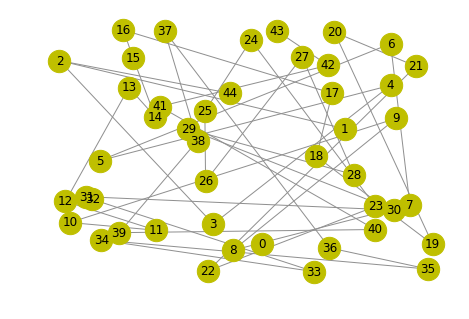

In [69]:
import networkx as nx
import matplotlib.pyplot as plt

def dibujar_grafo(Nodos, Aristas):
  
    G=nx.Graph()
    G.clear()

    #Dibuja los nodos
    G.add_nodes_from(Nodos)
    print(Nodos)


    #Dibuja aristas
    aristas = Aristas +  [(70 ,1 )]
    #print(aristas)
    G.add_edges_from(aristas)


    #nx.draw_networkx_labels(G,pos,labels,font_size=16)

    labels = {}
    for idx, node in enumerate(G.nodes()):
        labels[node] =  idx 

    nx.draw_random(G,node_color='y',edge_color='#909090',node_size=500, labels = labels )


Nodos = list(map( lambda x:problem.get_display(x) ,problem.get_nodes()))
Aristas = list(map(lambda x: (x,x+1), problem.get_nodes()))

print(Aristas)

dibujar_grafo(Nodos, Aristas)